# Seif El-Deen Gaber - EDA of the 2023 Stack Overflow Developer Survey 

This project explores the 2023 Stack Overflow Developer Survey data to uncover insights about the global developer community. It covers open source participation, salary trends by country, job satisfaction levels, age-employment relationships, and preferred technologies. 

Additionally, it breaks down social media habits, popular operating systems, reasons for updating resumes, and contrasts the programming languages developers use now versus what they aspire to work with. 

##### Here are the questions we're looking to address: 

 - How many developers are writing code for open source?
 - How much money do the developers get throughout the globe?
 - How much are the developers satisfied with their jobs around the globe?
 - What is the relation between the age of a developer and their work?
 - What are the social media sites that developers use?
 - Which is the most popular operating system among developers?
 - Why do most  developers update their resumes frequently?
 - What programming languages have the developers worked with, and what languages do they want to use in the future?
 - Which type of work location is preferred by the developers?



## Step 1: Importing the Libraries Required for Exploration and Visualization

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib import rcParams

## Step 2: Loading the Stack Overflow Developer Survey's Data

In [6]:
public_df = pd.read_csv (r'C:\Users\Seif\Desktop\Data Expo Project\survey_results_public.csv')

In [79]:
pd.set_option('display.max_columns', None)
public_df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

## Step 3: Data Cleaning (Converting Columns to Their Appropriate Data Type)

##### With regard to data cleaning, I'm going to do the following in the same exact order:

 * Standardize column names (strip whitespace)
 * Drop completely empty rows
 * Strip string values and replace empty strings with NaN
 * Convert appropriate columns to numeric
 * Convert object columns with category-like values to category type

In [9]:
#1 Standardize column names (strip whitespace)
public_df.columns = public_df.columns.str.strip()

#2 Drop empty rows
public_df.dropna(how='all', inplace=True)

#3 Strip string values and replace empty strings with NaN
str_cols = public_df.select_dtypes(include='object').columns
public_df[str_cols] = public_df[str_cols].apply(lambda col: col.str.strip())
public_df.replace('', np.nan, inplace=True)

#4 Convert appropriate columns to numeric
numeric_cols = ['Age', 'ConvertedComp']
for col in numeric_cols:
    if col in public_df.columns:
        public_df[col] = pd.to_numeric(public_df[col], errors='coerce')

#5 Convert object columns with category-like values to category type
category_cols = ['Employment', 'EdLevel', 'Country', 'DevType', 'OpenSourcer', 'JobSat', 'SocialMedia', 'WorkLoc']
for col in category_cols:
    if col in public_df.columns:
        public_df[col] = public_df[col].astype('category')

In [113]:
pd.set_option('display.max_rows', 0)
public_df.dtypes

Respondent           int64
MainBranch          object
Hobbyist            object
OpenSourcer       category
OpenSource          object
Employment        category
Country           category
Student             object
EdLevel           category
UndergradMajor      object
EduOther            object
OrgSize             object
                    ...   
EntTeams            object
SOComm              object
WelcomeChange       object
SONewContent        object
Age                float64
Gender              object
Trans               object
Sexuality           object
Ethnicity           object
Dependents          object
SurveyLength        object
SurveyEase          object
Length: 85, dtype: object

## Step 4: Breaking Down Popular Programming Languages by Developer Type

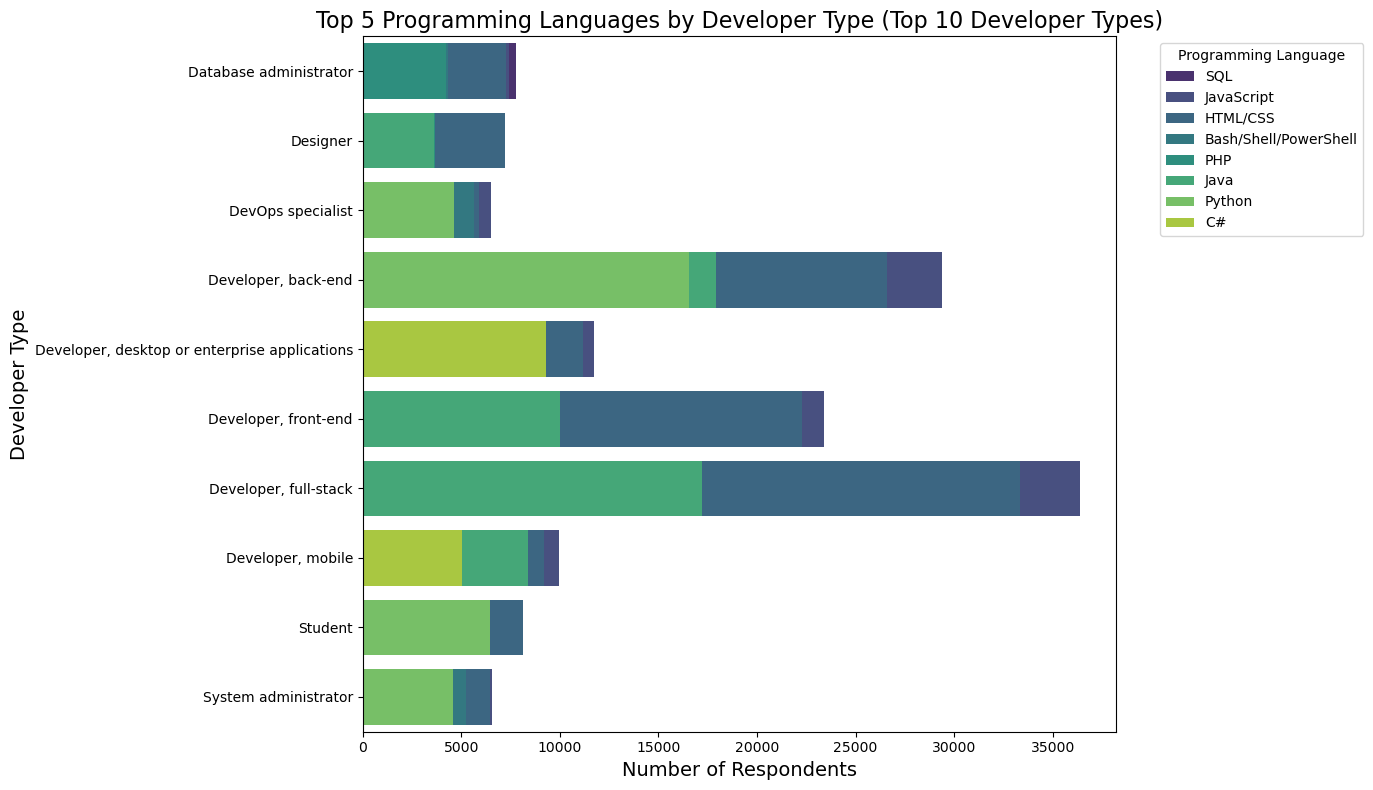

In [61]:
public_df = public_df[['DevType', 'LanguageWorkedWith']].dropna()
public_df['DevType'] = public_df['DevType'].str.split(';')
public_df['LanguageWorkedWith'] = public_df['LanguageWorkedWith'].str.split(';')
public_df = public_df.explode('DevType').explode('LanguageWorkedWith')

public_df['DevType'] = public_df['DevType'].str.strip()
public_df['LanguageWorkedWith'] = public_df['LanguageWorkedWith'].str.strip()

language_counts = public_df.groupby(['DevType', 'LanguageWorkedWith']).size().reset_index(name='Count')
top_langs = language_counts.sort_values(['DevType', 'Count'], ascending=[True, False]) \
                        .groupby('DevType').head(5)

top_dev_types = public_df['DevType'].value_counts().head(10).index
top_langs = top_langs[top_langs['DevType'].isin(top_dev_types)]

plt.figure(figsize=(14, 8))
sns.barplot(data=top_langs, x='Count', y='DevType', hue='LanguageWorkedWith', palette="viridis", dodge=False)
plt.title('Top 5 Programming Languages by Developer Type (Top 10 Developer Types)', fontsize=16)
plt.xlabel('Number of Respondents', fontsize=14)
plt.ylabel('Developer Type', fontsize=14)
plt.legend(title='Programming Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Step 5: Exploring the Data Based on the Provided Questions

Now that the required libraries are imported and the data from the survey is cleaned, let's begin our exploration as per the questions provided!

### Q1: How Many Developers Are Writing Code for Open Source?

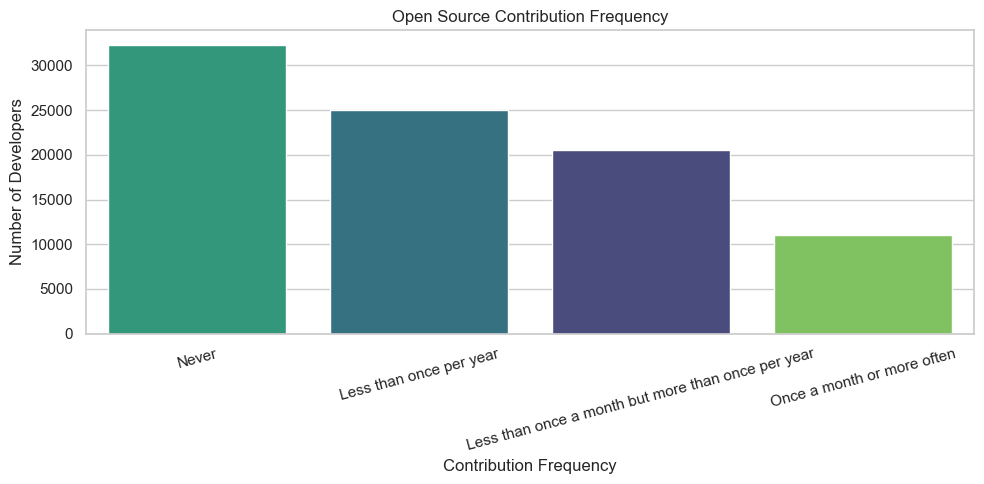

In [64]:
sns.set(style="whitegrid")

open_source_counts = public_df['OpenSourcer'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=open_source_counts.index, y=open_source_counts.values, hue=open_source_counts.index, palette="viridis", legend=False, order=open_source_counts.index)
plt.title("Open Source Contribution Frequency")
plt.ylabel("Number of Developers")
plt.xlabel("Contribution Frequency")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

### Q2: How Much Money Do the Developers Get Throughout the Globe?

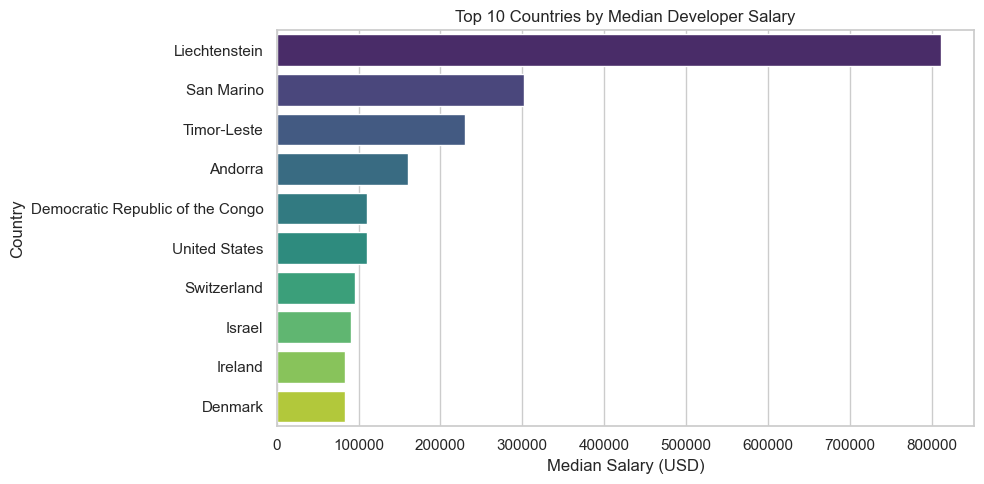

In [10]:
salary_df = public_df[['ConvertedComp', 'Country']].dropna()
salary_df['Country'] = salary_df['Country'].str.strip()  
salary_df = salary_df[~salary_df['Country'].str.contains('Other|,', regex=True)]
top_countries = salary_df.groupby('Country', observed=True)['ConvertedComp'].median().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index, palette="viridis", legend=False)
plt.title("Top 10 Countries by Median Developer Salary")
plt.xlabel("Median Salary (USD)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

##### <span style="color:red; font-weight: bold">At first glance, this plot looked unrealistic to me. It's hard to believe that developers get paid around 800k in Liechtenstein. I suspected that it's an outlier. I also suspected that San Marino, Timor-Leste, Andorra, and Democratic Republic of the Congo are outliers.</span>

In [58]:
print(public_df[public_df['Country'] == 'Liechtenstein']['ConvertedComp'].dropna())
print(public_df[public_df['Country'] == 'Democratic Republic of the Congo']['ConvertedComp'].dropna())

4413    811188.0
Name: ConvertedComp, dtype: float64
63535    110484.0
Name: ConvertedComp, dtype: float64


##### <span style="color:red; font-weight: bold">Countries 1 to 5 are clearly outliers, so I excluded them from the plot. The actual ranking starts with the United States.</span>

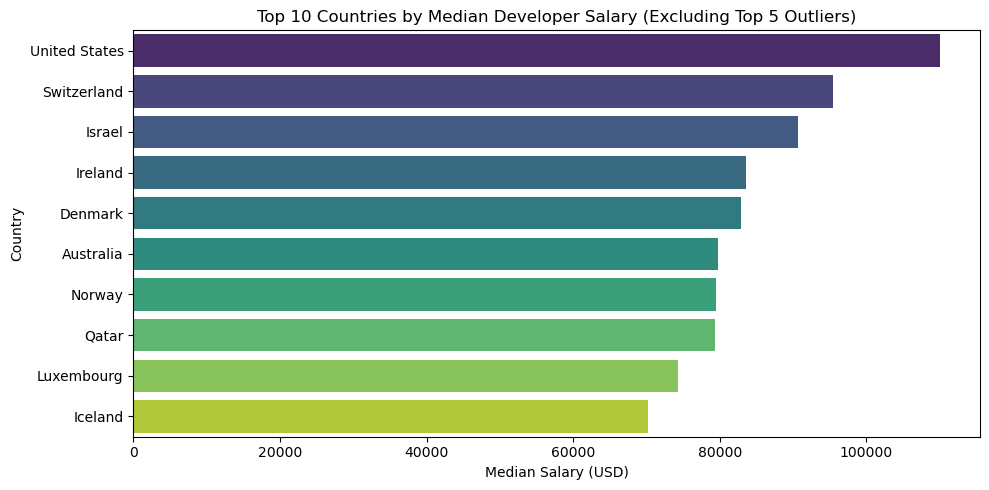

In [77]:
salary_df = public_df[['ConvertedComp', 'Country']].dropna()
salary_df['Country'] = salary_df['Country'].str.strip()  
salary_df = salary_df[~salary_df['Country'].str.contains('Other|,', regex=True)]

country_medians = salary_df.groupby('Country', observed=True)['ConvertedComp'].median().sort_values(ascending=False)
top_countries = country_medians.iloc[5:15]

plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index, palette="viridis", legend=False)
plt.title("Top 10 Countries by Median Developer Salary (Excluding Top 5 Outliers)")
plt.xlabel("Median Salary (USD)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

### Q3: How Much Are the Developers Satisfied With Their Jobs Around the Globe?

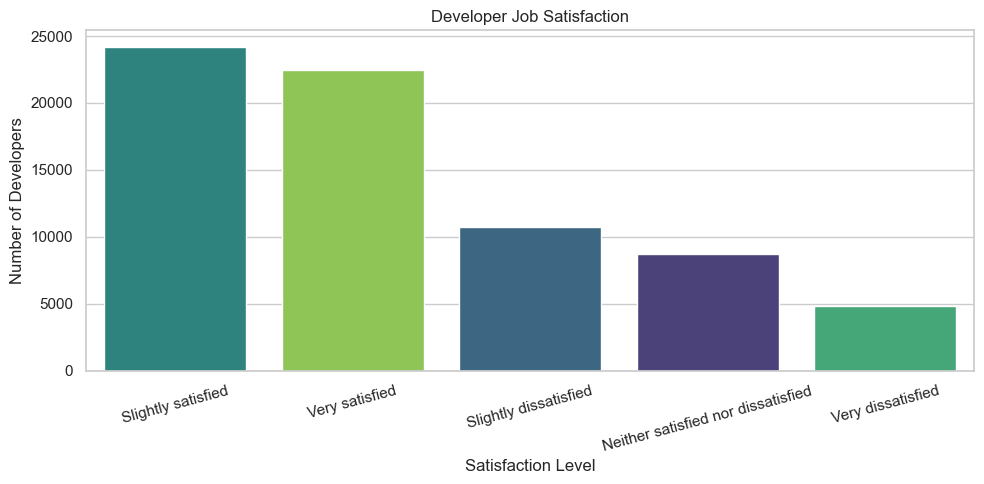

In [94]:
job_sat_counts = public_df['JobSat'].value_counts().sort_values(ascending=False) 
plt.figure(figsize=(10, 5))
sns.barplot(x=job_sat_counts.index, y=job_sat_counts.values, hue=job_sat_counts.index, palette="viridis", order=job_sat_counts.index)
plt.title("Developer Job Satisfaction")
plt.xlabel("Satisfaction Level")
plt.ylabel("Number of Developers")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

### Q4: What Is the Relation Between the Age of a Developer and Their Work?

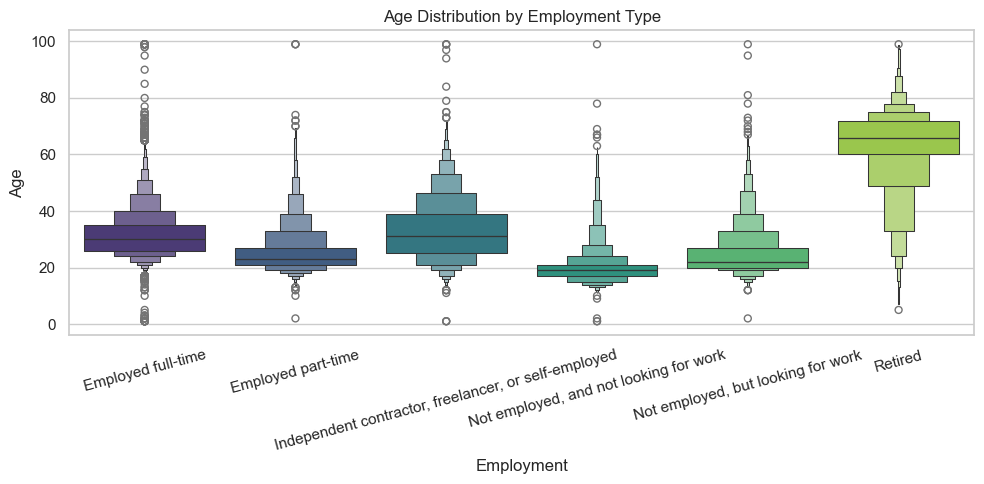

In [98]:
plt.figure(figsize=(10,5))
sns.boxenplot(data=public_df.dropna(subset=['Age', 'Employment']),
             x='Employment', y='Age', 
             hue='Employment', legend=False,
             palette='viridis', k_depth='proportion')
plt.xticks(rotation=15)
plt.title("Age Distribution by Employment Type")
plt.tight_layout()
plt.show()

### Q5: What Are the Social Media Sites That Developers Use?

In [32]:
public_df['SocialMedia'].unique()

['Twitter', 'Instagram', 'Reddit', 'Facebook', 'YouTube', ..., 'LinkedIn', 'Snapchat', 'Weibo 新浪微博', 'Hello', 'Youku Tudou 优酷']
Length: 15
Categories (14, object): ['Facebook', 'Hello', 'I don't use social media', 'Instagram', ..., 'Weibo 新浪微博', 'WhatsApp', 'YouTube', 'Youku Tudou 优酷']

##### <span style="color:red; font-weight: bold">Note: Some social media platforms contain special accent characters in their name that my current fonts don't support. As such, I had to use the DejaVu Sans font to deal with the accents, and I got rid of non-ASCII characters using the lambda function.</span>

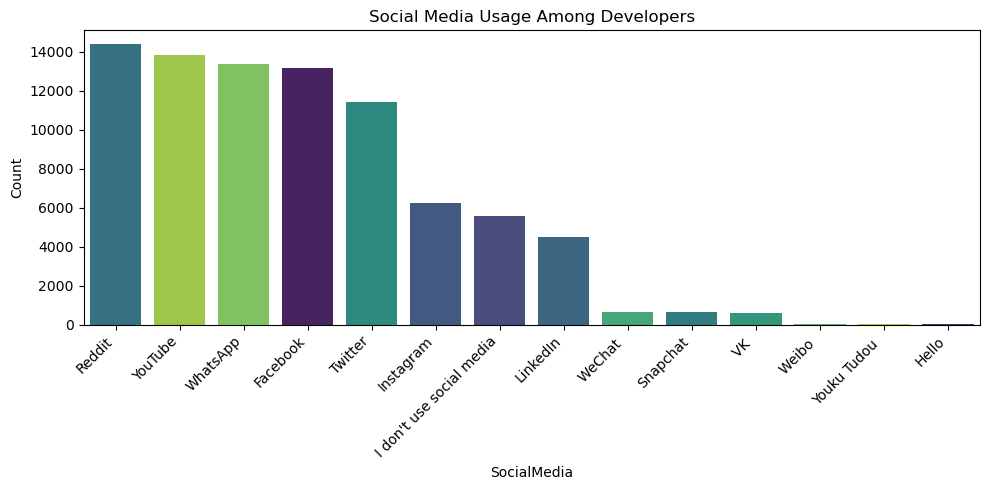

In [130]:
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['DejaVu Sans']  
social_df = public_df['SocialMedia'].dropna().apply(lambda x: x.encode('ascii', 'ignore').decode('ascii')).value_counts().reset_index(name='Count')
social_df = social_df.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=social_df, x='SocialMedia', y='Count', hue='SocialMedia', palette='viridis', order=social_df['SocialMedia'])
plt.title("Social Media Usage Among Developers")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Q6: Which Is the Most Popular Operating System Among Developers?

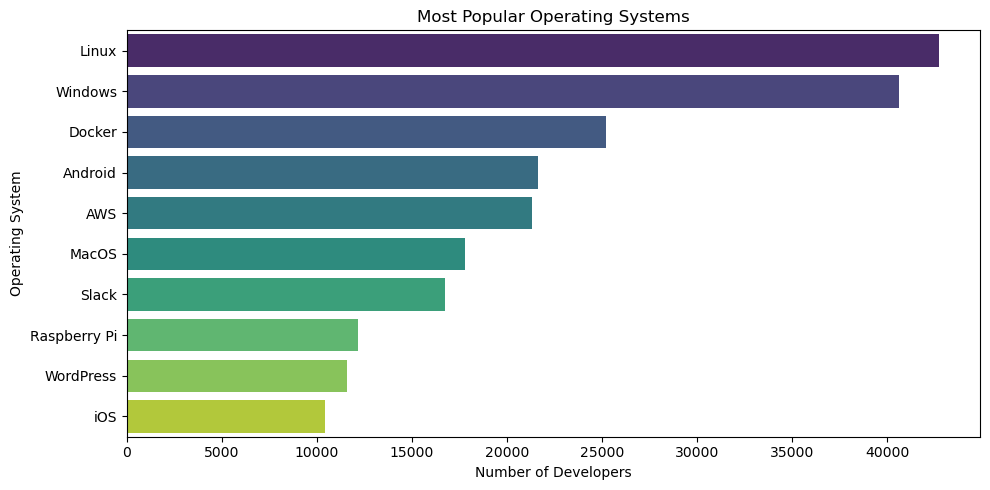

In [124]:
os_series = public_df['PlatformWorkedWith'].dropna().str.split(';').explode().str.strip()
os_counts = os_series.value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=os_counts.values, y=os_counts.index, hue=os_counts.index, palette="viridis")
plt.title("Most Popular Operating Systems")http://localhost:8888/tree
plt.xlabel("Number of Developers")
plt.ylabel("Operating System")
plt.tight_layout()
plt.show()

### Q7: Why Do Most Developers Update Their Resumes Frequently?

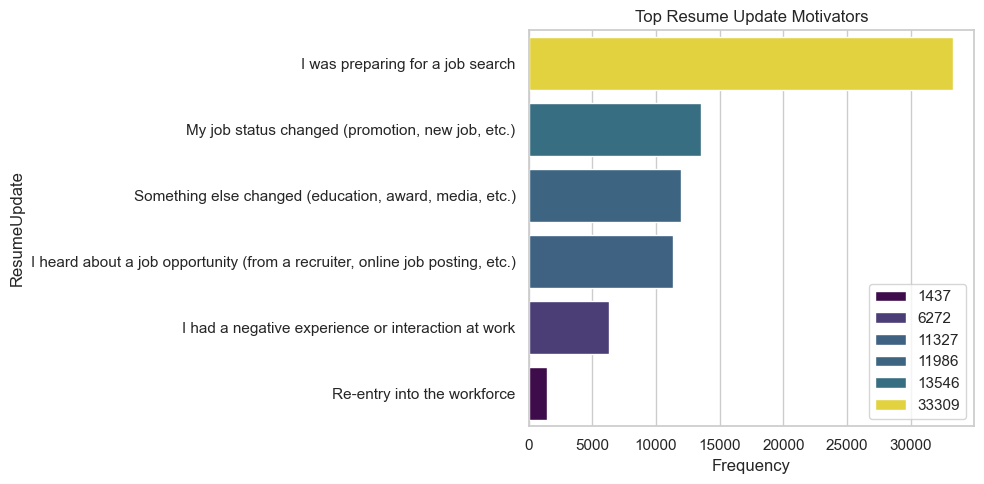

In [133]:
resume_reasons = public_df['ResumeUpdate'].dropna().str.split(';').explode()
resume_reason_counts = resume_reasons.value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=resume_reason_counts.values, y=resume_reason_counts.index, hue=resume_reason_counts.values, palette="viridis")
plt.title("Top Resume Update Motivators")
plt.xlabel("Frequency")
plt.tight_layout()
plt.show()

### Q8: What Programming Languages Have Developers Worked With, and What Do They Want to Use in the Future?

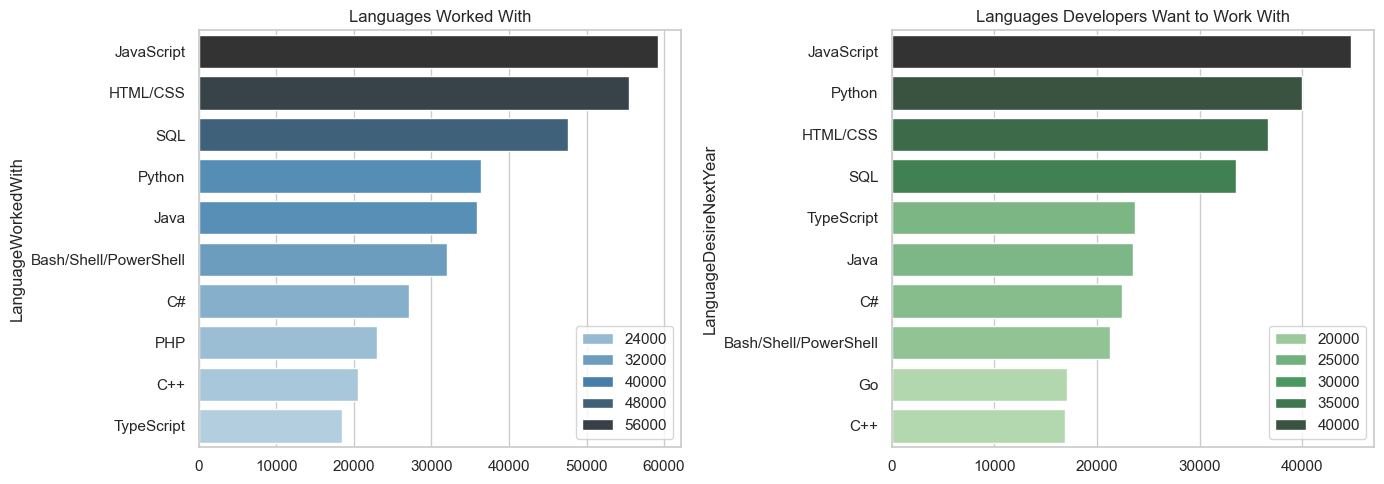

In [166]:
worked_langs = public_df['LanguageWorkedWith'].dropna().str.split(';').explode()
want_langs = public_df['LanguageDesireNextYear'].dropna().str.split(';').explode()

top_worked = worked_langs.value_counts().head(10)
top_wanted = want_langs.value_counts().head(10)

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
sns.barplot(x=top_worked.values, y=top_worked.index, ax=axs[0], hue=top_worked.values, palette="Blues_d")
axs[0].set_title("Languages Worked With")
sns.barplot(x=top_wanted.values, y=top_wanted.index, ax=axs[1], hue=top_wanted.values, palette="Greens_d")
axs[1].set_title("Languages Developers Want to Work With")
plt.tight_layout()
plt.show()


### Q9: Which Type of Work Location Is Preferred by the Developers?

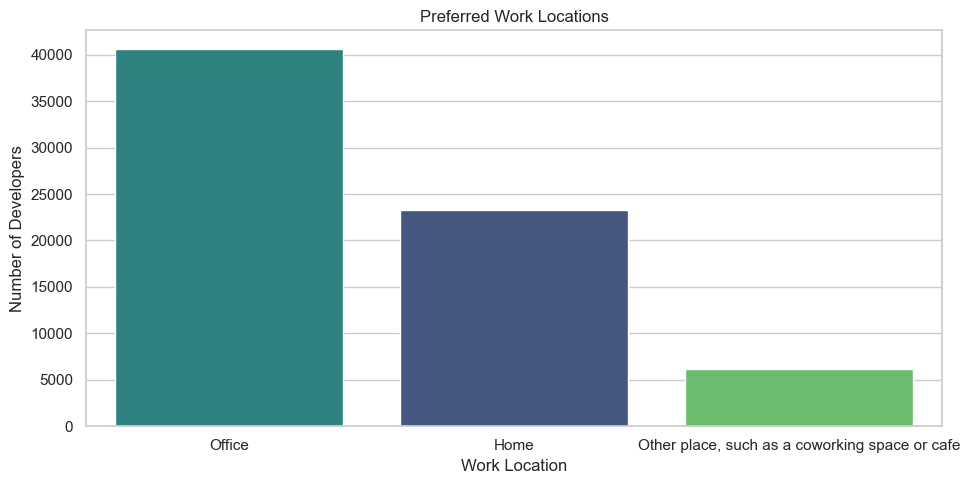

In [192]:
work_location_counts = public_df['WorkLoc'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=work_location_counts.index, y=work_location_counts.values, hue=work_location_counts.index, order=work_location_counts.index, palette="viridis")
plt.title("Preferred Work Locations")
plt.ylabel("Number of Developers")
plt.xlabel("Work Location")
plt.tight_layout()
plt.show()

## Summary of the Insights Derived From This EDA

 - **Open Source Participation:** A significant portion of developers contribute to open source, with varying frequencies (e.g., "Never," "Less than once per year," "Once a month or more often").
   
 - **Salary Trends by Country:** There are notable disparities in salaries across different countries. Developers in regions like the U.S., Western Europe, and parts of Asia tend to earn higher salaries compared to those in developing regions.
 
 - **Job Satisfaction:** Job satisfaction varies globally, but a positive correlation exists between higher salaries and greater job satisfaction.

 - **Age and Employment Relationship:** Younger developers are more likely to be students or in entry-level roles, while older developers dominate senior and managerial positions.

 - **Social Media Usage:** Platforms like YouTube, Reddit, and LinkedIn are among the most frequently used by developers, indicating where they consume and share content.

 - **Operating System Preferences:** Windows and macOS are quite common, but Linux shows a strong preference among developers, especially those involved in backend or DevOps roles.

 - **Resume Updates:** Developers typically update their resumes in response to new job opportunities, layoffs, or skill upgrades.

 - **Technology Aspirations vs. Current Use:** There is often a gap between the languages and tools developers currently use versus those they aspire to work with (e.g., many use JavaScript but aspire to use Rust or Go).

 - **Work Location Trends**: According to the data, a significant portion of developers prefer working from the office, though there's a clear global shift toward flexible work models for better work-life balance and autonomy.

